In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('./drought_data/us-droughts.csv')

In [6]:
df.head()

,releaseDate,FIPS,county,state,NONE,D0,D1,D2,D3,D4,validStart,validEnd,domStatisticFormatID
0,2000-11-07,2013,Aleutians East Borough,AK,100.0,0.0,0.0,0.0,0.0,0.0,2000-11-07,2000-11-13,1
1,2000-10-31,2013,Aleutians East Borough,AK,100.0,0.0,0.0,0.0,0.0,0.0,2000-10-31,2000-11-06,1
2,2000-10-24,2013,Aleutians East Borough,AK,100.0,0.0,0.0,0.0,0.0,0.0,2000-10-24,2000-10-30,1
3,2000-10-17,2013,Aleutians East Borough,AK,100.0,0.0,0.0,0.0,0.0,0.0,2000-10-17,2000-10-23,1
4,2000-10-10,2013,Aleutians East Borough,AK,100.0,0.0,0.0,0.0,0.0,0.0,2000-10-10,2000-10-16,1


In [8]:
# As this data set is pretty broad, let's scale it down to
# something familiar and just observe California
df = (df[df["state"] == 'CA'])
df.head()

,releaseDate,FIPS,county,state,NONE,D0,D1,D2,D3,D4,validStart,validEnd,domStatisticFormatID
8280,2000-11-07,6001,Alameda County,CA,100.0,0.0,0.0,0.0,0.0,0.0,2000-11-07,2000-11-13,1
8281,2000-10-31,6001,Alameda County,CA,100.0,0.0,0.0,0.0,0.0,0.0,2000-10-31,2000-11-06,1
8282,2000-10-24,6001,Alameda County,CA,100.0,0.0,0.0,0.0,0.0,0.0,2000-10-24,2000-10-30,1
8283,2000-10-17,6001,Alameda County,CA,100.0,0.0,0.0,0.0,0.0,0.0,2000-10-17,2000-10-23,1
8284,2000-10-10,6001,Alameda County,CA,100.0,0.0,0.0,0.0,0.0,0.0,2000-10-10,2000-10-16,1


In [16]:
len(df[(df['county'] =='Alameda County') & (df['D4'] > 0.0)])

112

In [74]:
df[(df['county'] =='Shasta County')].head()

,releaseDate,FIPS,county,state,NONE,D0,D1,D2,D3,D4,validStart,validEnd,domStatisticFormatID
10260,2000-11-07,6089,Shasta County,CA,100.0,0.0,0.0,0.0,0.0,0.0,2000-11-07,2000-11-13,1
10261,2000-10-31,6089,Shasta County,CA,100.0,0.0,0.0,0.0,0.0,0.0,2000-10-31,2000-11-06,1
10262,2000-10-24,6089,Shasta County,CA,100.0,0.0,0.0,0.0,0.0,0.0,2000-10-24,2000-10-30,1
10263,2000-10-17,6089,Shasta County,CA,100.0,0.0,0.0,0.0,0.0,0.0,2000-10-17,2000-10-23,1
10264,2000-10-10,6089,Shasta County,CA,100.0,0.0,0.0,0.0,0.0,0.0,2000-10-10,2000-10-16,1


## First lets observe the percentage of the time each county has been in extreme drought.  After some observation of the data set, each data entry is once every week, so this should be pretty accurate

In [39]:
ext_drought = {}
for county in df.county.unique():
    pct = len(df[(df['county'] == county) & (df['D4'] > 0.0)])/len(df[(df['county'] ==county)])
    ext_drought[county] = pct

In [40]:
# Split the data into two dictionarys so it is easier to read graphically
dict2 = {}
klist = []

for key in ext_drought:
    if ext_drought[key] > .11: # some criterion
        dict2[key] = ext_drought[key]
        klist.append(key)

for key in klist:
    del ext_drought[key]

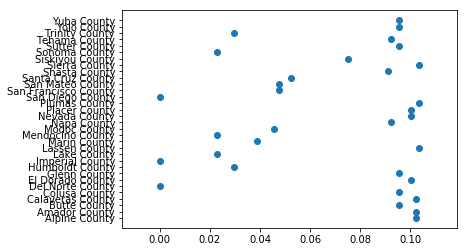

In [41]:
# This scatter plot shows all the counties that were in extreme draught
# less than 11% of the time
plt.scatter(list(ext_drought.values()), list(ext_drought.keys()))
axes = plt.gca()
plt.show()


In [ ]:
# The counties with no extreme drought are Northern Coastal counties, with the 
# exception of San Diego county (we will address this later, because this part
# of the data does not make sense).  In general, these counties are northern,
# more coastal or more mountainous counties.

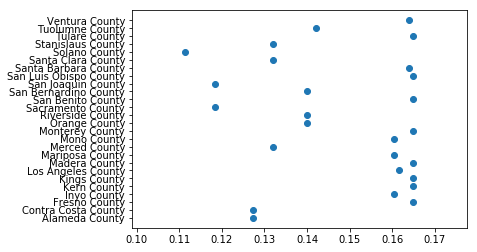

In [42]:
# This second plot shows counties that were in draught 
plt.scatter(list(dict2.values()), list(dict2.keys()))
axes = plt.gca()
plt.show()


In [ ]:
# It is fairly easy to see that the majority of counties that are in 
# extreme drought >11% of the time are typically southern counties or sometimes
# simply inland counties.

## Now let's observe the percentage of the time each county was not experiencing any drought conditions.

In [67]:
no_drought = {}
for county in df.county.unique():
    pct = len(df[(df['county'] == county) & (df['NONE'] == 100.0)])/len(df[(df['county'] ==county)])
    no_drought[county] = pct
len(no_drought)/len(df.county.unique())

1.0

In [68]:
# Let's split our data into two dicts again for readibility of the graphs
dict2 = {}
klist = []

for key in no_drought:
    if no_drought[key] > .38: # some criterion
        dict2[key] = no_drought[key]
        klist.append(key)

for key in klist:
    del no_drought[key]

len(no_drought), len(dict2)

(29, 29)

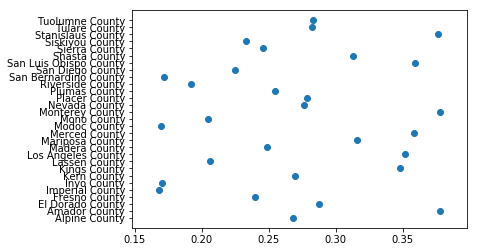

In [70]:
plt.scatter(list(no_drought.values()), list(no_drought.keys()))
axes = plt.gca()
plt.show()

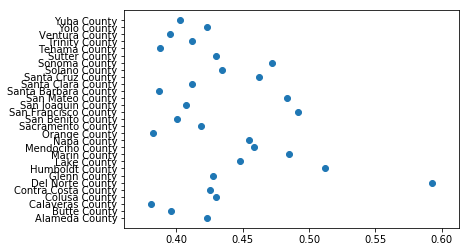

In [71]:
plt.scatter(list(dict2.values()), list(dict2.keys()))
axes = plt.gca()
plt.show()

In [72]:
# As should be expected, this information is a bit of the converse of the 
# previous data.  Our most drought-free counties are our Northern Coastal
# counties (Del Norte, Humboldt, Sonoma) while our most drought prone counties
# are in the south.  This starts to answer the question about San Diego because
# while it was never really in severe drought, the area is also very rarely
# drought free. This also answers some curiousities I had about the northern
# inland counties. While they are not so frequently in extreme drought, they 
# are very rarely drought free (Siskiyou, Shasta, etc).

## Now lets consider a drought time line of a specific county.  In this example I have selected Shasta County, as I find it to be an interesting location to observe drought as it is both notoriously hot and functions as one of the main water storage counties in the state.  Shasta County is also my home county.

In [75]:
# Our scale of drought severity will be from 0-500, or rather the sum of
# D0, D1, D2, D3, D4 over time.  We would assume that the drought conditions
# would be more drastic during summer months and mild during the rainy season

In [78]:
shasta = df[(df['county'] =='Shasta County')]

In [79]:
shasta.dtypes

releaseDate              object
FIPS                      int64
county                   object
state                    object
NONE                    float64
D0                      float64
D1                      float64
D2                      float64
D3                      float64
D4                      float64
validStart               object
validEnd                 object
domStatisticFormatID      int64
dtype: object

In [80]:
shasta.head()

,releaseDate,FIPS,county,state,NONE,D0,D1,D2,D3,D4,validStart,validEnd,domStatisticFormatID
10260,2000-11-07,6089,Shasta County,CA,100.0,0.0,0.0,0.0,0.0,0.0,2000-11-07,2000-11-13,1
10261,2000-10-31,6089,Shasta County,CA,100.0,0.0,0.0,0.0,0.0,0.0,2000-10-31,2000-11-06,1
10262,2000-10-24,6089,Shasta County,CA,100.0,0.0,0.0,0.0,0.0,0.0,2000-10-24,2000-10-30,1
10263,2000-10-17,6089,Shasta County,CA,100.0,0.0,0.0,0.0,0.0,0.0,2000-10-17,2000-10-23,1
10264,2000-10-10,6089,Shasta County,CA,100.0,0.0,0.0,0.0,0.0,0.0,2000-10-10,2000-10-16,1


In [88]:
shasta["release_date"] = shasta['releaseDate'].str.replace('[^\w\s]','')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [90]:
df1 = 

,releaseDate,FIPS,county,state,NONE,D0,D1,D2,D3,D4,validStart,validEnd,domStatisticFormatID,release_date
10260,20001107,6089,Shasta County,CA,100.0,0.0,0.0,0.0,0.0,0.0,2000-11-07,2000-11-13,1,20001107
10261,20001031,6089,Shasta County,CA,100.0,0.0,0.0,0.0,0.0,0.0,2000-10-31,2000-11-06,1,20001031
10262,20001024,6089,Shasta County,CA,100.0,0.0,0.0,0.0,0.0,0.0,2000-10-24,2000-10-30,1,20001024
10263,20001017,6089,Shasta County,CA,100.0,0.0,0.0,0.0,0.0,0.0,2000-10-17,2000-10-23,1,20001017
10264,20001010,6089,Shasta County,CA,100.0,0.0,0.0,0.0,0.0,0.0,2000-10-10,2000-10-16,1,20001010


In [92]:
shasta["releaseDate"] = pd.to_numeric(shasta["releaseDate"])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [94]:
df1 = shasta.sort_values(by=['releaseDate'])

In [95]:
# Now we have all of shasta counties data sorted by release date in the format
# YYYYMMDD, which although seems awkward, works really well for our uses.
# Now lets modify our drought column to be the sum of all the drought columns

In [96]:
df1['DSUM'] = df1['D0'] + df1['D1'] + df1['D2'] + df1['D3'] + df1['D4']

In [101]:
dict1 = pd.Series(df1.DSUM.values,index=df1.releaseDate).to_dict()